<a href="https://colab.research.google.com/github/Zhiyuan-03/AI_in_Transportation_Exercise/blob/main/AH2174_lab1_2025(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Course AH2174/FAH3002 - Traffic Simulation Modeling and Applications   
Lab1: Programming and Computer Simulation Basics  
Author: Pengnan Chi  
Date: 10.29.2024





In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from datetime import datetime

In [37]:
%matplotlib inline


class LinearCongruentialGenerator():
    """
    A class to generate a sequence of pseudo-random numbers based on the Linear Congruential Generator (LCG) method.
    """

    def __init__(self, a, b, m, z):
        self.a = a
        self.b = b
        self.m = m
        self.initial_z = z

    def generate(self, n):
        """
        Generates a sequence of pseudo-random numbers using the LCG formula.
        """
################################################### Your Code here
        random_numbers = []  # List to store generated random numbers
        zi = self.initial_z  # Start with the initial seed

        for _ in range(n):
            zi = (zi * self.a + self.b) % self.m  # Update seed using LCG formula
            xi = zi / self.m  # Normalize to [0, 1)
            random_numbers.append(xi)

        return random_numbers

    @staticmethod
    def plot_random_numbers(random_numbers):
        """
        Plots the sequence of random numbers to visualize their distribution over iterations.
        """
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 2))
        plt.plot(random_numbers, '.-b', alpha=0.4)
        plt.ylabel('Random numbers')
        plt.xlabel('Iterations')
        plt.title('Random Numbers Over Iterations')
        plt.show()

    @staticmethod
    def hist_random_numbers(random_numbers):
        """
        Displays a histogram of the random numbers to visualize their distribution.
        """
        import matplotlib.pyplot as plt
        plt.figure(figsize=(10, 2))
        plt.hist(random_numbers, bins=50)
        plt.title('Distribution of Random Numbers')
        plt.show()



# Generating Random Numbers


---

One of the most common method to generate random real number between 0 and 1, i.e. $\mathcal{U}(0,1)$ , is the Linear Congruential Generator (LCG) method. In this section, you will need to implement a LCG following the pseudo-code:


1.  Select parameters $a$, $b$, $m$,  and seed $z_0$
2.  Repeat for $i=1,2,\cdots, n$
    *   $z_i = (z_{i-1} * a + b) \bmod m $
    *   $x_i = z_i / m$  
3.  return $\{x_1,\cdots, x_n\}$


 Complete the `generate()` method for the  `LinearCongruentialGenerator` class by implementing the algorithm under "`YOUR CODE HERE`".





###  Test your code!

1.  Initialize your random number generator
2.  Generate random numbers
3.  Analysis



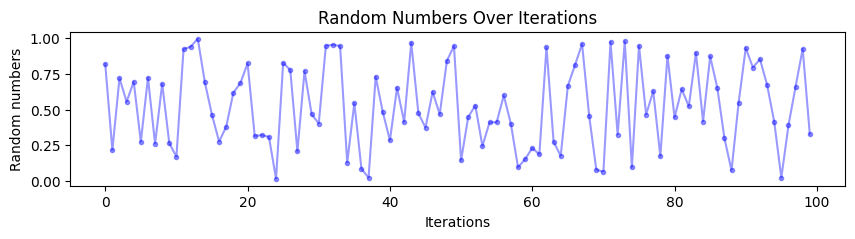

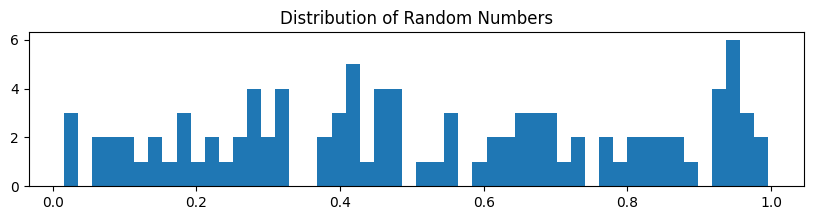

In [47]:
# Initialize random number generator
lcg = LinearCongruentialGenerator(a=1140671485, b=12820163, m=16777216, z=124324)
#lcg = LinearCongruentialGenerator(a=22, b=1, m=72, z=124324)

# Genrate random numbers
random_numbers = lcg.generate(100)


# Plot
LinearCongruentialGenerator.plot_random_numbers(random_numbers)
LinearCongruentialGenerator.hist_random_numbers(random_numbers)


# Monte Carlo Estimation
---

$\int_a^bh(x)dx \approx \mathbb{E}[h(X)], X\sim U(0,1)$

1.  Implement function $h(x)$ on `function_h`
2.  Generate random numbers $\{x_1,\cdots,x_n\} \sim \mathcal{U}(0,1)$
3.  Return $\frac{1}{n}\sum_i^n h(x_i)$


Complete `function_h` and `MonteCarloEstimator.estimate_integral` by writing code under "`YOUR CODE HERE`".


In [33]:
def function_h(x):
    """
    Compute the function h(x) = (1 - x^2)^(3/2).

    Parameters:
        x : Input array of values for which the function will be computed.

    Returns:
        y (list of float): Output array where each element is (1 - x^2)^(3/2) for the corresponding element in x.
    """
    return [(1 - xi**2)**(3/2) for xi in x]


class MonteCarloEstimator():
    """
    Monte Carlo Estimator class for estimating the integral of a function
    using randomly generated samples.
    """

    def __init__(self, n, a=1140671485, b=12820163, m=2**24, z=124324):
        self.lgc = LinearCongruentialGenerator(a=a, b=b, m=m, z=z)
       self.n = n
#####################################################################################
    def estimate_integral(self, function_h):
        """
        Estimate the integral of the given function using Monte Carlo sampling.
        """
        random_numbers = self.lgc.generate(self.n)
        h_values = function_h(random_numbers)
        y = sum(h_values) / self.n
        return y


### Test your code!

In [48]:
mce = MonteCarloEstimator(10**3,)
integral_result =  mce.estimate_integral(function_h)
print(f"{integral_result:.6f}")

0.603094


### Expected Results

$a=1140671485, \ \ b=12820163, \ \  m=2^{24}, \ \  z=124324$

1. when $n=10^8$, result: $0.589045$
2. when $n=10^6$, result: $0.588737$
3. when $n=10^4$, result: $0.587693$
4. when $n=10^2$, result: $0.563525$
5. when $n=10^2$, result: $0.581024$



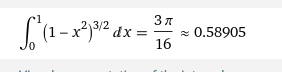


# Continous RV (Inverse Transform Method)
---

$p(x) = \lambda e^{-\lambda x}$.  
$y = P(x) = 1-e^{-\lambda x}$.  
$x = -\frac{ln(1-y)}{\lambda}, y \sim U(0,1)$


Implement `ExpenotialRandomNumberGenerator.inverse_transform` and `ExpenotialRandomNumberGenerator.generate`

In [46]:
import math
import matplotlib.pyplot as plt

class ExpenotialRandomNumberGenerator():
    """
    Generate random numbers from an exponential distribution
    using the inverse transform method and a linear congruential generator (LCG)
    as the uniform random source.
    """

    def __init__(self, lambda_, a=1140671485, b=12820163, m=2**24, z=124324):
        self.lambda_ = lambda_
        self.lcg = LinearCongruentialGenerator(a, b, m, z)
#########################################################################
    def inverse_transform(self, x):
        """
        Apply the inverse transform method to convert uniform random variables to
        exponential random variables.
        """
        y = [-math.log(1 - xi) / self.lambda_ for xi in x]
        return y
#####################################################################################
    def generate(self, n):
        """
        Generate n random numbers from an exponential distribution.
        """
        uniform_randoms = self.lcg.generate(n)
        exponential_randoms = self.inverse_transform(uniform_randoms)
        return exponential_randoms

    @staticmethod
    def hist_random_numbers(random_numbers, lambda_, bins=40):
        plt.figure(figsize=(6, 2))
        plt.hist(random_numbers, bins=bins, label=f'lambda: {lambda_}')
        plt.ylabel("Density")
        plt.xlabel("x")
        plt.xlim([-0.5, 8])
        plt.legend()
        plt.show()


### Test your code!

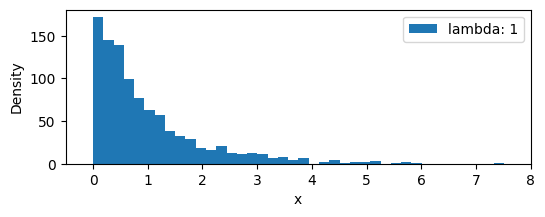

In [45]:
lambda_ = 1
e_rg = ExpenotialRandomNumberGenerator(lambda_)
random_numbers = e_rg.generate(1000)

ExpenotialRandomNumberGenerator.hist_random_numbers(random_numbers, lambda_)